In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv(r"D:\FraudDetection\fraudTrain.csv")
data.dropna(inplace=True)
data.info()

test = pd.read_excel(r"D:\FraudDetection\fraudTest.xlsx")
test.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ID           1002103 non-null  int64  
 1   Time         1002103 non-null  object 
 2   Card Number  1002103 non-null  float64
 3   merchant     1002103 non-null  object 
 4   category     1002103 non-null  object 
 5   Amount       1002103 non-null  float64
 6   firstName    1002103 non-null  object 
 7   lastName     1002103 non-null  object 
 8   trans_num    1002103 non-null  object 
 9   is_fraud     1002103 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 84.1+ MB


In [24]:
data['Time'] = pd.to_datetime(data['Time'])
test['Time'] = pd.to_datetime(test['Time'])



data.head()


,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0


In [25]:
data.describe()

,ID,Time,Card Number,Amount,is_fraud
count,1.002103e+06,1002103,1.002103e+06,1.002103e+06,1.002103e+06
mean,5.010510e+05,2019-08-04 22:56:32.836923392,4.171379e+17,7.025616e+01,5.701011e-03
min,0.000000e+00,2019-01-01 00:00:00,6.041621e+10,1.000000e+00,0.000000e+00
25%,2.505255e+05,2019-05-05 11:43:00,1.800000e+14,9.640000e+00,0.000000e+00
50%,5.010510e+05,2019-08-05 16:02:00,3.520000e+15,4.742000e+01,0.000000e+00
75%,7.515765e+05,2019-11-17 17:16:00,4.640000e+15,8.304000e+01,0.000000e+00
max,1.002102e+06,2020-02-15 16:42:00,4.990000e+18,2.894890e+04,1.000000e+00
std,2.892824e+05,NaN,1.308841e+18,1.602039e+02,7.528954e-02


<Axes: xlabel='Amount', ylabel='Count'>

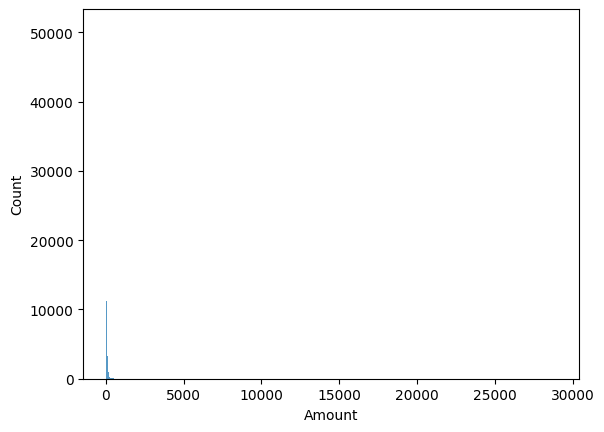

In [26]:
sns.histplot(x=data['Amount'])
#before handling outliers

# Feature Engineering

In [27]:
data['year'] = data['Time'].dt.year
data['day'] = data['Time'].dt.day
data['month'] = data['Time'].dt.month
data['hour'] = data['Time'].dt.hour

data['fullName'] = data['firstName'] + data['lastName']
data['fullNamehour'] = data['fullName'] + data['year'].astype(str) + data['month'].astype(str) + data['day'].astype(str) + data['hour'].astype(str)
data['fullNamesinglehour'] = data['fullName'] + data['hour'].astype(str)
data['fullNamecard'] = data['fullName'] + data['Card Number'].astype(str)
data['cardhour'] = data['Card Number'].astype(str) + data['year'].astype(str) + data['month'].astype(str) + data['day'].astype(str) + data['hour'].astype(str)
data['fullNameday'] = data['fullName'] + data['year'].astype(str) + data['month'].astype(str) + data['day'].astype(str)

###

test['year'] = test['Time'].dt.year
test['day'] = test['Time'].dt.day
test['month'] = test['Time'].dt.month
test['hour'] = test['Time'].dt.hour

test['fullName'] = test['firstName'] + test['lastName']
test['fullNamehour'] = test['fullName'] + test['year'].astype(str) + test['month'].astype(str) + test['day'].astype(str) + test['hour'].astype(str)
test['fullNamesinglehour'] = test['fullName'] + test['hour'].astype(str)
test['fullNamecard'] = test['fullName'] + test['Card Number'].astype(str)
test['cardhour'] = test['Card Number'].astype(str) + test['year'].astype(str) + test['month'].astype(str) + test['day'].astype(str) + test['hour'].astype(str)
test['fullNameday'] = test['fullName'] + test['year'].astype(str) + test['month'].astype(str) + test['day'].astype(str)


###########################################################################




counts = data['fullName'].value_counts()
data['countName'] = data['fullName'].map(counts)

counts = data['fullNamehour'].value_counts()
data['countNamehour'] = data['fullNamehour'].map(counts)

counts = data['fullNamesinglehour'].value_counts()
data['countNamesinglehour'] = data['fullNamesinglehour'].map(counts)

counts = data['fullNamecard'].value_counts()
data['countNamecard'] = data['fullNamecard'].map(counts)




###

counts = test['fullName'].value_counts()
test['countName'] = test['fullName'].map(counts)

counts = test['fullNamehour'].value_counts()
test['countNamehour'] = test['fullNamehour'].map(counts)

counts = test['fullNamesinglehour'].value_counts()
test['countNamesinglehour'] = test['fullNamesinglehour'].map(counts)

counts = test['fullNamecard'].value_counts()
test['countNamecard'] = test['fullNamecard'].map(counts)




############################################################################

data['dis'] = np.abs(data['Amount'] - data['Amount'].mean())

###

test['dis'] = np.abs(test['Amount'] - test['Amount'].mean())


############################################################################





data.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,...,fullNamehour,fullNamesinglehour,fullNamecard,cardhour,fullNameday,countName,countNamehour,countNamesinglehour,countNamecard,dis
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,...,JenniferBanks2019110,JenniferBanks0,JenniferBanks2700000000000000.0,2700000000000000.02019110,JenniferBanks201911,1578,1,40,1578,65.286157
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,...,StephanieGill2019110,StephanieGill0,StephanieGill630000000000.0,630000000000.02019110,StephanieGill201911,2363,1,62,2363,36.973843
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,...,EdwardSanchez2019110,EdwardSanchez0,EdwardSanchez38900000000000.0,38900000000000.02019110,EdwardSanchez201911,379,1,19,379,149.853843
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,...,JeremyWhite2019110,JeremyWhite0,JeremyWhite3530000000000000.0,3530000000000000.02019110,JeremyWhite201911,382,1,15,382,25.256157
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,...,TylerGarcia2019110,TylerGarcia0,TylerGarcia376000000000000.0,376000000000000.02019110,TylerGarcia201911,1570,1,57,1570,28.296157


# DROP COLUMNS

In [28]:
data.drop(['Card Number','day','year','fullName','fullNamehour','fullNamesinglehour','fullNamecard','cardhour','fullNameday'],axis=1,inplace=True)
data.drop(['Time','ID','merchant','trans_num','firstName','lastName'],axis=1,inplace=True)

##


test.drop(['Card Number','day','year','fullName','fullNamehour','fullNamesinglehour','fullNamecard','cardhour','fullNameday'],axis=1,inplace=True)
test.drop(['Time','ID','merchant','trans_num','firstName','lastName'],axis=1,inplace=True)



In [29]:
data.describe()

,Amount,is_fraud,month,hour,countName,countNamehour,countNamesinglehour,countNamecard,dis
count,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06
mean,7.025616e+01,5.701011e-03,6.700486e+00,1.280453e+01,1.421049e+03,1.230413e+00,6.760443e+01,1.405742e+03,5.759861e+01
std,1.602039e+02,7.528954e-02,3.645710e+00,6.816683e+00,5.910044e+02,5.226107e-01,3.814408e+01,5.733059e+02,1.494914e+02
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,3.842958e-03
25%,9.640000e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.129000e+03,1.000000e+00,3.900000e+01,1.089000e+03,1.898616e+01
50%,4.742000e+01,0.000000e+00,7.000000e+00,1.400000e+01,1.531000e+03,1.000000e+00,5.900000e+01,1.518000e+03,4.486384e+01
75%,8.304000e+01,0.000000e+00,1.000000e+01,1.900000e+01,1.953000e+03,1.000000e+00,8.900000e+01,1.942000e+03,6.446616e+01
max,2.894890e+04,1.000000e+00,1.200000e+01,2.300000e+01,3.524000e+03,8.000000e+00,2.000000e+02,2.451000e+03,2.887864e+04


In [30]:
test.describe()

,Amount,is_fraud,month,hour,countName,countNamehour,countNamesinglehour,countNamecard,dis
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,69.392810,0.003860,9.508536,12.809062,790.149221,1.243321,38.125976,781.478364,56.520450
std,156.745941,0.062008,1.978205,6.810924,333.555220,0.528449,22.103919,323.541973,146.200968
min,1.000000,0.000000,6.000000,0.000000,6.000000,1.000000,1.000000,6.000000,0.002810
25%,9.630000,0.000000,8.000000,7.000000,611.000000,1.000000,22.000000,503.000000,18.802810
50%,47.290000,0.000000,10.000000,14.000000,827.000000,1.000000,33.000000,821.000000,44.392810
75%,83.010000,0.000000,12.000000,19.000000,1070.000000,1.000000,50.000000,1057.000000,63.687190
max,22768.110000,1.000000,12.000000,23.000000,1965.000000,8.000000,130.000000,1474.000000,22698.717190


# Scaling

In [31]:
# scaler = MinMaxScaler()

# numerical_features = ['Amount','dis']
# test[numerical_features] = scaler.fit_transform(test[numerical_features])
# data[numerical_features] = scaler.fit_transform(data[numerical_features])


# OutLiers

In [32]:
q1 = data['Amount'].quantile(0.25)
q3 = data['Amount'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr



print(upper," ",lower)

193.14000000000001   -100.46000000000001


In [33]:

outliers1 = (data['Amount'] < lower)
data['Amount'] = data['Amount'].where(~outliers1, other=lower)

outliers2 = (data['Amount'] > upper)
data['Amount'] = data['Amount'].where(~outliers2, other=upper)

data.describe()


,Amount,is_fraud,month,hour,countName,countNamehour,countNamesinglehour,countNamecard,dis
count,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06
mean,5.778750e+01,5.701011e-03,6.700486e+00,1.280453e+01,1.421049e+03,1.230413e+00,6.760443e+01,1.405742e+03,5.759861e+01
std,5.307679e+01,7.528954e-02,3.645710e+00,6.816683e+00,5.910044e+02,5.226107e-01,3.814408e+01,5.733059e+02,1.494914e+02
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,3.842958e-03
25%,9.640000e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.129000e+03,1.000000e+00,3.900000e+01,1.089000e+03,1.898616e+01
50%,4.742000e+01,0.000000e+00,7.000000e+00,1.400000e+01,1.531000e+03,1.000000e+00,5.900000e+01,1.518000e+03,4.486384e+01
75%,8.304000e+01,0.000000e+00,1.000000e+01,1.900000e+01,1.953000e+03,1.000000e+00,8.900000e+01,1.942000e+03,6.446616e+01
max,1.931400e+02,1.000000e+00,1.200000e+01,2.300000e+01,3.524000e+03,8.000000e+00,2.000000e+02,2.451000e+03,2.887864e+04


In [34]:

q1 = test['Amount'].quantile(0.25)
q3 = test['Amount'].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

outliers1 = (test['Amount'] < lower)
test['Amount'] = test['Amount'].where(~outliers1, other=lower)

outliers2 = (test['Amount'] > upper)
test['Amount'] = test['Amount'].where(~outliers2, other=upper)

test.describe()

,Amount,is_fraud,month,hour,countName,countNamehour,countNamesinglehour,countNamecard,dis
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,57.607360,0.003860,9.508536,12.809062,790.149221,1.243321,38.125976,781.478364,56.520450
std,52.833274,0.062008,1.978205,6.810924,333.555220,0.528449,22.103919,323.541973,146.200968
min,1.000000,0.000000,6.000000,0.000000,6.000000,1.000000,1.000000,6.000000,0.002810
25%,9.630000,0.000000,8.000000,7.000000,611.000000,1.000000,22.000000,503.000000,18.802810
50%,47.290000,0.000000,10.000000,14.000000,827.000000,1.000000,33.000000,821.000000,44.392810
75%,83.010000,0.000000,12.000000,19.000000,1070.000000,1.000000,50.000000,1057.000000,63.687190
max,193.080000,1.000000,12.000000,23.000000,1965.000000,8.000000,130.000000,1474.000000,22698.717190


<Axes: xlabel='Amount', ylabel='Count'>

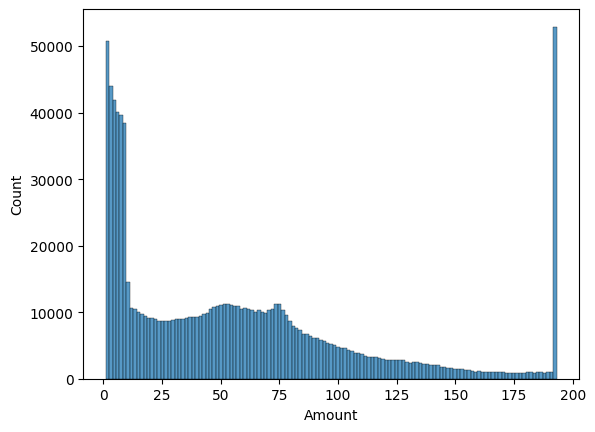

In [35]:
sns.histplot(x=data['Amount'])
#after handling outliers

# Label Encoding

In [36]:
label_encoder = LabelEncoder()

data['category'] = label_encoder.fit_transform(data['category'])




test['category'] = label_encoder.fit_transform(test['category'])

data.head()


,category,Amount,is_fraud,month,hour,countName,countNamehour,countNamesinglehour,countNamecard,dis
0,8,4.97,0.0,1,0,1578,1,40,1578,65.286157
1,4,107.23,0.0,1,0,2363,1,62,2363,36.973843
2,0,193.14,0.0,1,0,379,1,19,379,149.853843
3,2,45.00,0.0,1,0,382,1,15,382,25.256157
4,9,41.96,0.0,1,0,1570,1,57,1570,28.296157


In [37]:
data.corr()

,category,Amount,is_fraud,month,hour,countName,countNamehour,countNamesinglehour,countNamecard,dis
category,1.000000,-0.166438,0.019908,0.000812,0.157480,0.005569,0.031895,0.139970,0.007059,0.167515
Amount,-0.166438,1.000000,0.134870,-0.002838,-0.135416,-0.011716,-0.009376,-0.108533,-0.011278,0.261558
is_fraud,0.019908,0.134870,1.000000,-0.014178,0.012535,-0.051202,0.088604,-0.047118,-0.052029,0.215762
month,0.000812,-0.002838,-0.014178,1.000000,0.000609,0.000040,0.093378,0.000981,0.000050,-0.001199
hour,0.157480,-0.135416,0.012535,0.000609,1.000000,0.106775,0.089699,0.399367,0.109740,0.041146
countName,0.005569,-0.011716,-0.051202,0.000040,0.106775,1.000000,0.190380,0.787381,0.969388,0.002788
countNamehour,0.031895,-0.009376,0.088604,0.093378,0.089699,0.190380,1.000000,0.235367,0.185745,0.032197
countNamesinglehour,0.139970,-0.108533,-0.047118,0.000981,0.399367,0.787381,0.235367,1.000000,0.771963,0.031791
countNamecard,0.007059,-0.011278,-0.052029,0.000050,0.109740,0.969388,0.185745,0.771963,1.000000,0.003384
dis,0.167515,0.261558,0.215762,-0.001199,0.041146,0.002788,0.032197,0.031791,0.003384,1.000000


In [38]:
test.corr()

,category,Amount,is_fraud,month,hour,countName,countNamehour,countNamesinglehour,countNamecard,dis
category,1.000000,-0.168952,0.016980,0.000264,0.157214,0.005399,0.034513,0.136332,0.006453,0.165853
Amount,-0.168952,1.000000,0.111289,0.000003,-0.138121,-0.006552,-0.015278,-0.096710,-0.006457,0.259045
is_fraud,0.016980,0.111289,1.000000,-0.011748,0.011686,-0.037617,0.073481,-0.031670,-0.038545,0.181328
month,0.000264,0.000003,-0.011748,1.000000,-0.004995,0.001507,0.072873,-0.001953,0.000906,-0.000904
hour,0.157214,-0.138121,0.011686,-0.004995,1.000000,0.111958,0.097679,0.388996,0.114440,0.034988
countName,0.005399,-0.006552,-0.037617,0.001507,0.111958,1.000000,0.208241,0.779708,0.969606,0.002884
countNamehour,0.034513,-0.015278,0.073481,0.072873,0.097679,0.208241,1.000000,0.260739,0.203886,0.026630
countNamesinglehour,0.136332,-0.096710,-0.031670,-0.001953,0.388996,0.779708,0.260739,1.000000,0.764211,0.031654
countNamecard,0.006453,-0.006457,-0.038545,0.000906,0.114440,0.969606,0.203886,0.764211,1.000000,0.003609
dis,0.165853,0.259045,0.181328,-0.000904,0.034988,0.002884,0.026630,0.031654,0.003609,1.000000


# Saving the processed data

In [39]:
data.to_csv('processedTrain.csv', index=False)
test.to_csv('processedTest.csv', index=False)

# Random Forest


In [40]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# import joblib
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.metrics import confusion_matrix
# import xgboost as xgb


# X = data.drop(['is_fraud'],axis=1)
# y = data['is_fraud']

# X_train = X
# X_test = test.drop(['is_fraud'],axis=1)
# y_train = y
# y_test = test['is_fraud']

# model = RandomForestClassifier(n_estimators=100, random_state=42)

# print(X_train.info())

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)


# print("Accuracy:", accuracy)
# print("Classification Report:\n", report)

# cm = confusion_matrix(y_test, y_pred)

# print("Confusion Matrix:")
# print(cm)

# OverSampling

In [41]:
# from imblearn.over_sampling import SMOTEN


# smote = SMOTEN(random_state=42)

# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# print("Original target distribution:\n", y_train.value_counts())
# print("Resampled target distribution:\n", y_resampled.value_counts())

In [42]:
# # import joblib
# # from sklearn.metrics import confusion_matrix

# # model = RandomForestClassifier(n_estimators=100, random_state=42)
# from sklearn.model_selection import train_test_split

# from sklearn.svm import SVC
# import joblib
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.metrics import confusion_matrix

# X = data.drop(['is_fraud'],axis=1)
# y = data['is_fraud']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


# # X_train = X
# # X_test = test.drop(['is_fraud'],axis=1)
# # y_train = y
# # y_test = test['is_fraud']

# model = SVC(kernel='linear')

# model.fit(X_train, y_train)

# joblib.dump(model, 'Final/Models/SVMTrainedModel.pkl')



# # model.fit(X_train, y_train)

# # joblib.dump(model, 'TrainedRandomForest.pkl')

# # # model = joblib.load('TrainedRandomForest.pkl')


# # # confussion matrix (DONE)
# # # oversampling



# # y_pred = model.predict(X_test)

# # accuracy = accuracy_score(y_test, y_pred)
# # report = classification_report(y_test, y_pred)


# # print("Accuracy:", accuracy)
# # print("Classification Report:\n", report)

# # cm = confusion_matrix(y_test, y_pred)

# # print("Confusion Matrix:")
# # print(cm)





In [43]:
# cm = confusion_matrix(y_test, y_pred)

# print("Confusion Matrix:")
# print(cm)

## Pre Processing

> ID, Time, Card Number, merchant, category, Amount, firstName, lastName, trans_num, is_fraud

- time to datetime
- New Columns(fullNameday, cardhour, fullNamecard, fullNamesinglehour, fullNamehour, fullName, hour, month, year, day)
- New Column(time_diff)
- New Columns('countName', 'countNamehour', 'countNamesinglehour', 'countNamecard', 'countcardhour')
- New Column(dis)
- Drop Columns('Time','ID','merchant','trans_num','firstName','lastName')
- Drop Columns('Card Number','day','year','fullName','fullNamehour','fullNamesinglehour','fullNamecard','cardhour','fullNameday')
- Label Encoding('category', 'fullName', 'fullNamehour', 'fullNamesinglehour', 'fullNamecard', 'cardhour', 'fullNameday', 'time_diff')



# To Be Done

1. saving model (DONE)
2. oversampling (DONE)
3. adding models to gui
4. model tuning
5. heatmap for corr

6. save preprocessed data (DONE)
7. model tuning
8. visualization 
